## Import The Libraries

In [97]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import zipfile

In [98]:
import warnings 
warnings.filterwarnings('ignore')

## Read The Dataset

In [102]:
df=pd.read_csv("bank.csv",sep=";")

## Now See The Dataset To Analyse

In [103]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## See The Attributes Of DataFrame 

In [104]:
df.shape

(41188, 21)

In [105]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [106]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

## Separate The Numerical And Categorical Columns

In [107]:
num_cols=df.dtypes[df.dtypes!='object'].index
cat_cols=df.dtypes[df.dtypes=='object'].index

In [108]:
num_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [109]:
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

## Now Find The Columns Whose  Are Numerical But Act As Categorical and vice versa

In [110]:
for i in df.columns:
    print(f'Feature {i} has a unique count of {df[i].nunique()}')

Feature age has a unique count of 78
Feature job has a unique count of 12
Feature marital has a unique count of 4
Feature education has a unique count of 8
Feature default has a unique count of 3
Feature housing has a unique count of 3
Feature loan has a unique count of 3
Feature contact has a unique count of 2
Feature month has a unique count of 10
Feature day_of_week has a unique count of 5
Feature duration has a unique count of 1544
Feature campaign has a unique count of 42
Feature pdays has a unique count of 27
Feature previous has a unique count of 8
Feature poutcome has a unique count of 3
Feature emp.var.rate has a unique count of 10
Feature cons.price.idx has a unique count of 26
Feature cons.conf.idx has a unique count of 26
Feature euribor3m has a unique count of 316
Feature nr.employed has a unique count of 11
Feature y has a unique count of 2


In [111]:
eda_num=['age','duration','campaign']

In [112]:
eda_cat=['job','marital','education','default', 'housing', 'loan', 'contact',
       'month', 'day_of_week','previous', 'poutcome','emp.var.rate','nr.employed']

In [113]:
len(eda_cat)

13

In [114]:
len(eda_num)

3

## EDA (Exploratory Data Analysis)

## Univariate Analysis

### Histogram

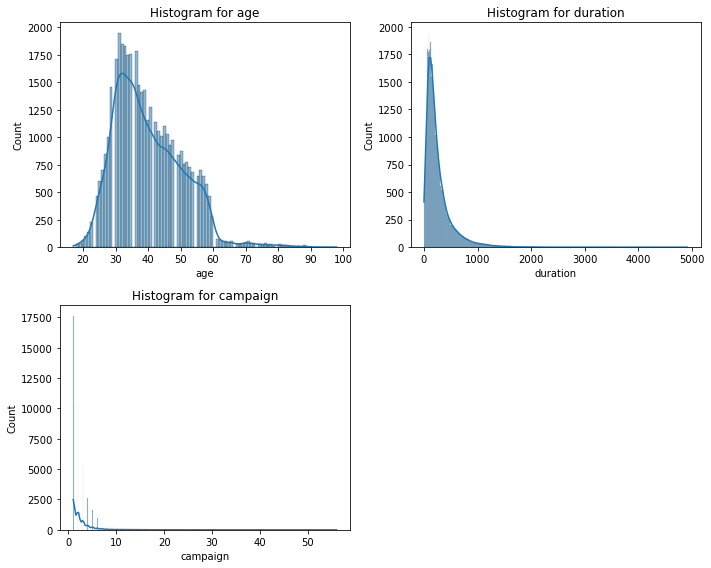

In [115]:
plt.figure(figsize=(10,8))
for i in range(len(eda_num)):
    plt.subplot(2,2,i+1)
    sns.histplot(x=df[eda_num[i]],kde=True)
    plt.title(f'Histogram for {eda_num[i]}')
plt.tight_layout()
plt.show()

## Inference := 

* age,duration and compaign are right skewed .

### Boxplot

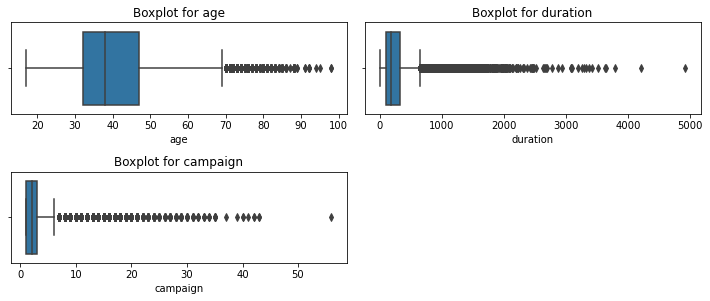

In [116]:
plt.figure(figsize=(10,8))
for i in range(len(eda_num)):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=df[eda_num[i]])
    plt.title(f'Boxplot for {eda_num[i]}')
plt.tight_layout()
plt.show()

## Inference :=

* age , compaign,cons.conf.idx  and duration  have right outliers .

## Bivariate Analysis

### Countplot

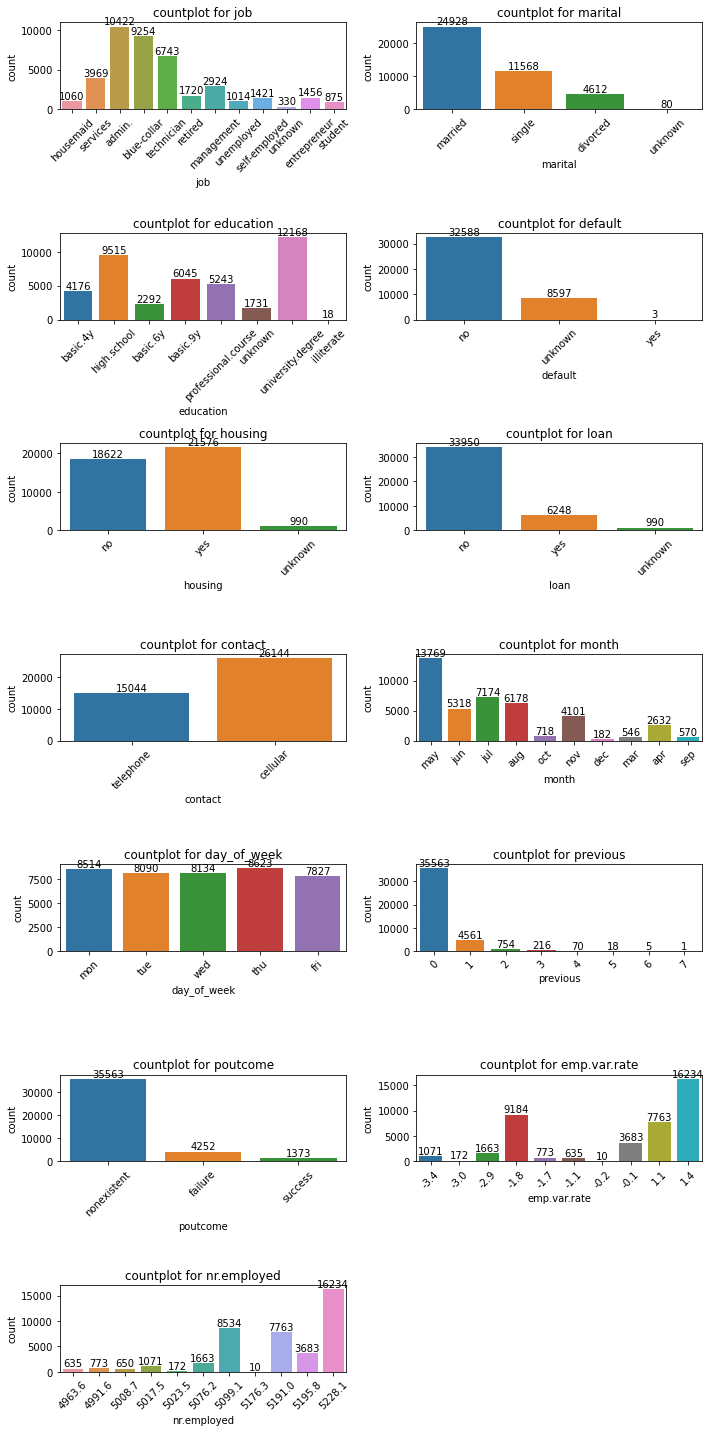

In [117]:
plt.figure(figsize=(10,20))
for i in range(len(eda_cat)):
    plt.subplot(7,2,i+1)
    ax=sns.countplot(x=df[eda_cat[i]])
    ax.bar_label(ax.containers[0])
    plt.title(f'countplot for {eda_cat[i]}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Inference := 

* People having admin and blue-collar jobs in high amount.
* There are more married .
* Mostly have a High school or University degree .
* Mostly Default is no .
* housing is like 50-50 between yes or no .
* most of them not having loan .
* cellular contact is more .
* may month have high number .
* day_of_week all having almost same amount of numbers .
* poutcome of nonexistence is more .
* emp.var.rate is highly 1.4 .
* nr.employed is more where emp.var.rate is high .

## Boxplot WRT to Traget

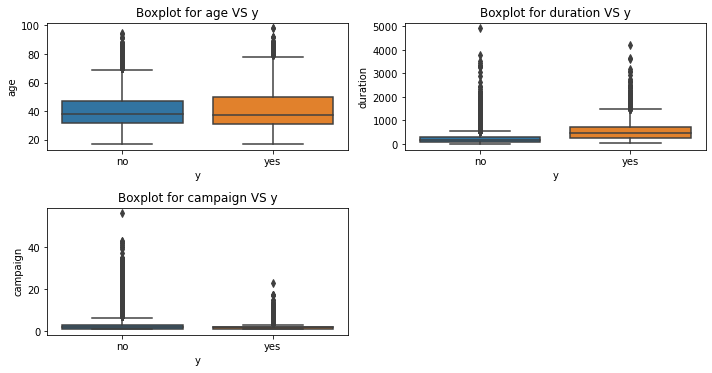

In [118]:
plt.figure(figsize=(10,10))
for i in range(len(eda_num)):
    plt.subplot(4,2,i+1)
    sns.boxplot(y=df[eda_num[i]],x=df['y'])
    plt.title(f'Boxplot for {eda_num[i]} VS y')
plt.tight_layout()
plt.show()

 ## Inference :=

* high euribor3m and cons.price.idx have high chance of no.

## Countplot WRT to Target

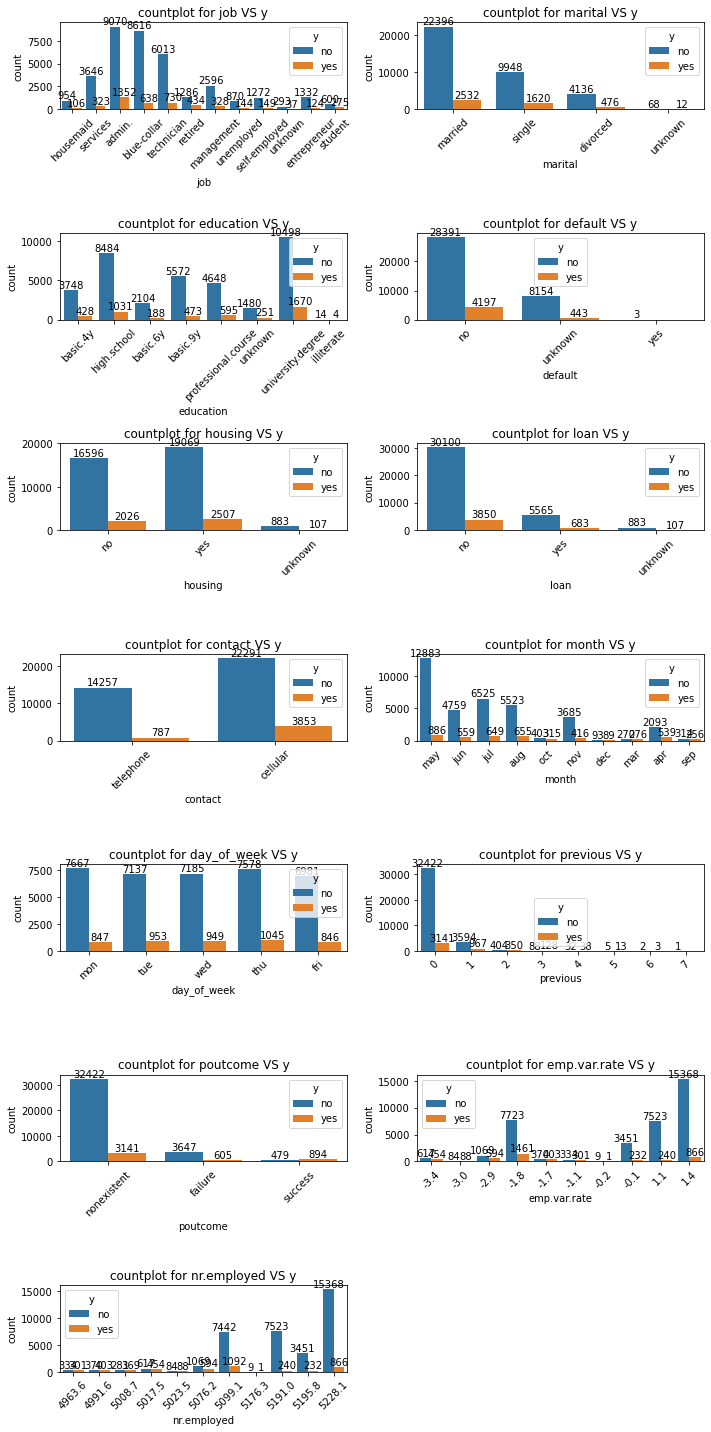

In [119]:
plt.figure(figsize=(10,20))
for i in range(len(eda_cat)):
    plt.subplot(7,2,i+1)
    ax=sns.countplot(x=df[eda_cat[i]],hue=df['y'])
    for j in ax.containers:
        ax.bar_label(j)
    plt.title(f'countplot for {eda_cat[i]} VS y')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Inference := 

* In the month of Oct,dec,mar and sep almost  50% got yes .

### Correlation

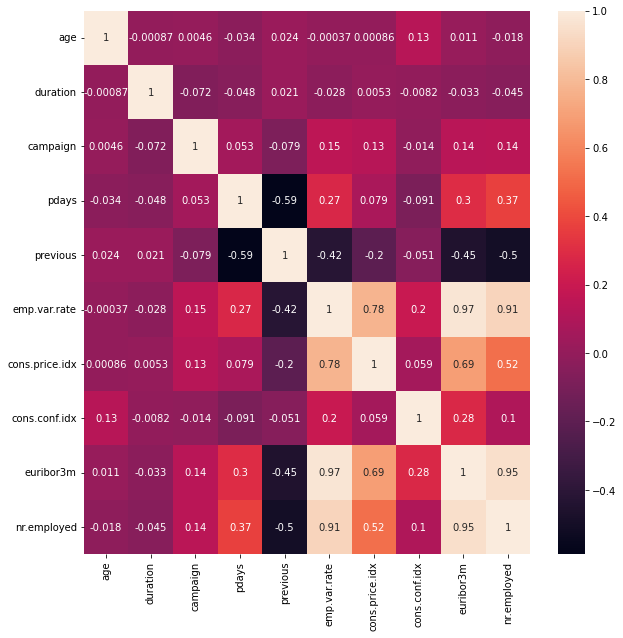

In [120]:
corr=df[num_cols].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

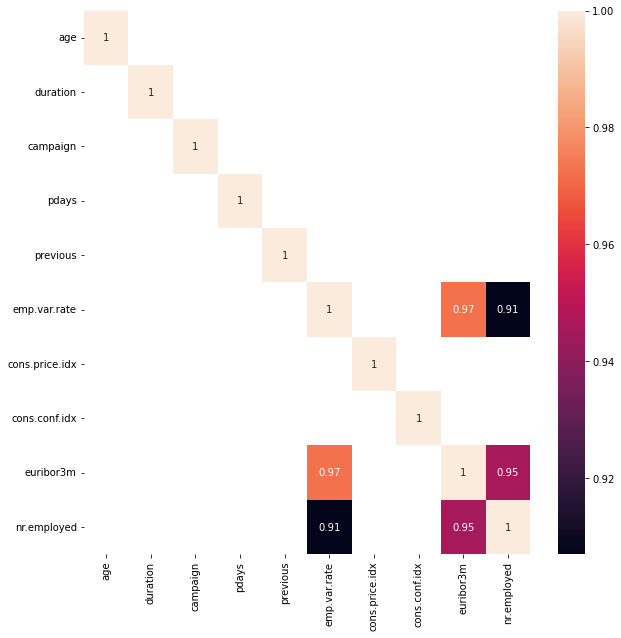

In [121]:
plt.figure(figsize=(10,10))
sns.heatmap(corr[abs(corr)>=0.8],annot=True)
plt.show()








## Inference :=

* Highly Correlated elements are nr.employed and emp.var.rate .

## Check and Treating The Null Values

In [122]:
def null_check(x):
    nv=df.isnull().sum()
    res=pd.DataFrame({'Features':nv.index,'Null Count':nv.values,'Null %':(nv.values/df.shape[0])*100})
    res=res.sort_values('Null %',ascending=False)
    return res

In [123]:
null_check(df)

,Features,Null Count,Null %
0,age,0,0.0
11,campaign,0,0.0
19,nr.employed,0,0.0
18,euribor3m,0,0.0
17,cons.conf.idx,0,0.0
16,cons.price.idx,0,0.0
15,emp.var.rate,0,0.0
14,poutcome,0,0.0
13,previous,0,0.0
12,pdays,0,0.0


## Check the duplicates and drop them if any

In [124]:
df.duplicated().sum()

12

In [125]:
df.drop_duplicates(inplace=True)

In [126]:
df.duplicated().sum()

0

## Also check the min and max and data which is inconsistent so you can impute them also

In [127]:
a=df.describe(percentiles=[0.01,0.02,0.03,0.04,0.97,0.98,0.99]).T
a.iloc[:,3:]

,min,1%,2%,3%,4%,50%,97%,98%,99%,max
age,17.000,23.000,24.000,25.000,25.000,38.000,59.000,62.000,71.000,98.000
duration,0.000,11.000,17.000,23.000,29.000,180.000,911.000,1052.500,1271.250,4918.000
campaign,1.000,1.000,1.000,1.000,1.000,2.000,9.000,11.000,14.000,56.000
pdays,0.000,3.000,6.000,9.000,999.000,999.000,999.000,999.000,999.000,999.000
previous,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2.000,2.000,7.000
emp.var.rate,-3.400,-3.400,-3.400,-3.000,-2.900,1.100,1.400,1.400,1.400,1.400
cons.price.idx,92.201,92.201,92.379,92.431,92.469,93.749,94.465,94.465,94.465,94.767
cons.conf.idx,-50.800,-49.500,-47.100,-47.100,-47.100,-41.800,-31.400,-30.100,-26.900,-26.900
euribor3m,0.634,0.658,0.714,0.720,0.740,4.857,4.967,4.968,4.968,5.045
nr.employed,4963.600,4963.600,4991.600,4991.600,5008.700,5191.000,5228.100,5228.100,5228.100,5228.100


## And also Treating the Outliers if effect of them

In [128]:
cols_left_skewed = ['duration','age','pdays']
def l_o_treat(x):
    x=x.clip(lower=x.quantile(0.01))
    return x

In [129]:
df[cols_left_skewed] = df[cols_left_skewed].apply(l_o_treat)

In [130]:
cols_right_skewed = ['previous','campaign','duration','age']
def u_o_treat(x):
    x=x.clip(upper=x.quantile(0.99))
    return x

In [131]:
df[cols_right_skewed] = df[cols_right_skewed].apply(u_o_treat)

In [132]:
a1=df.describe(percentiles=[0.01,0.02,0.03,0.04,0.97,0.98,0.99]).T
a1.iloc[:,3:]

,min,1%,2%,3%,4%,50%,97%,98%,99%,max
age,23.000,23.000,24.000,25.000,25.000,38.000,59.000,62.000,71.0000,71.000
duration,11.000,11.000,17.000,23.000,29.000,180.000,911.000,1052.500,1271.0625,1271.250
campaign,1.000,1.000,1.000,1.000,1.000,2.000,9.000,11.000,14.0000,14.000
pdays,3.000,3.000,6.000,9.000,999.000,999.000,999.000,999.000,999.0000,999.000
previous,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2.000,2.0000,2.000
emp.var.rate,-3.400,-3.400,-3.400,-3.000,-2.900,1.100,1.400,1.400,1.4000,1.400
cons.price.idx,92.201,92.201,92.379,92.431,92.469,93.749,94.465,94.465,94.4650,94.767
cons.conf.idx,-50.800,-49.500,-47.100,-47.100,-47.100,-41.800,-31.400,-30.100,-26.9000,-26.900
euribor3m,0.634,0.658,0.714,0.720,0.740,4.857,4.967,4.968,4.9680,5.045
nr.employed,4963.600,4963.600,4991.600,4991.600,5008.700,5191.000,5228.100,5228.100,5228.1000,5228.100


## Label Encoding

In [133]:
df['y']=df['y'].replace({'yes':1,'no':0})

In [134]:
df['y'].value_counts()

0    36537
1     4639
Name: y, dtype: int64

In [135]:
df.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

In [136]:
cat_cols=df.dtypes[df.dtypes=='object'].index

In [137]:
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [138]:
df_dum=pd.get_dummies(data=df,columns=cat_cols,drop_first=True)
print(df_dum.shape)
print(df_dum.columns)

(41176, 54)
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexist

## Select X and Y 

In [139]:
x=df_dum.drop(['y'],axis=1)
y=df_dum['y']

## Split into train and test data

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [142]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(30882, 53)
(10294, 53)
(30882,)
(10294,)


## Handling Unbalanced Data .

In [143]:
import imblearn

In [144]:
from imblearn.over_sampling import RandomOverSampler

In [145]:
from collections import Counter

In [146]:
Counter(y_train)

Counter({0: 27443, 1: 3439})

In [147]:
over = RandomOverSampler(sampling_strategy=0.8)
x_over, y_over = over.fit_resample(x_train,y_train)

## Standard Scaler .

In [148]:
from sklearn.preprocessing import StandardScaler  

In [149]:
ss = StandardScaler()
ss.fit(x_train)
x_train_ss = ss.transform(x_train)

x_test_ss = ss.transform(x_test)
print(x_train_ss.shape)
print(x_test_ss.shape)

(30882, 53)
(10294, 53)


In [150]:
x_train_ss = pd.DataFrame(x_train_ss, columns=x_train.columns)
x_test_ss = pd.DataFrame(x_test_ss, columns=x_test.columns)
print(x_train_ss.shape)
print(x_test_ss.shape)

(30882, 53)
(10294, 53)


## Advanced Function Which calculate all models scores

In [151]:
from sklearn.metrics import *

In [152]:
def eval_classification(model,x_train,x_test,y_train,y_test,modelname):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    cm=confusion_matrix(y_test,y_pred)
    cr=classification_report(y_test,y_pred)
    train=model.score(x_train,y_train)
    test=model.score(x_test,y_test)
    pre1=precision_score(y_test,y_pred)
    rec1=recall_score(y_test,y_pred)
    res=pd.DataFrame({'Train Acc':train,'Test Acc':test,'PRECISON':pre1,'RECALL':rec1},index=[modelname])
    print('Confusion matrix\n',cm)
    print('Classification report\n',cr)
    return res,y_pred

## Import the Model 

In [153]:
from sklearn.linear_model import LogisticRegression

## Logistic Regression .

In [154]:
lg1=LogisticRegression()

In [155]:
lg1_res,lg1_pred=eval_classification(lg1,x_train,x_test,y_train,y_test,'Log_Reg')
lg1_res

Confusion matrix
 [[8835  259]
 [ 707  493]]
Classification report
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      9094
           1       0.66      0.41      0.51      1200

    accuracy                           0.91     10294
   macro avg       0.79      0.69      0.73     10294
weighted avg       0.89      0.91      0.90     10294



,Train Acc,Test Acc,PRECISON,RECALL
Log_Reg,0.911469,0.906159,0.655585,0.410833


## ROC AUC 

In [156]:
from sklearn.metrics import roc_auc_score,roc_curve

In [157]:
ypred_prob = lg1.predict_proba(x_test)  
print(ypred_prob[:5])  # top5 values
print(ypred_prob.shape)

[[0.01705641 0.98294359]
 [0.89811758 0.10188242]
 [0.78279253 0.21720747]
 [0.92096912 0.07903088]
 [0.99034791 0.00965209]]
(10294, 2)


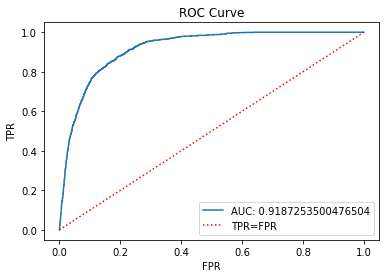

In [158]:
fpr,tpr,thresh = roc_curve(y_test,ypred_prob[:,1])   # ROC curve
auc_score = roc_auc_score(y_test,ypred_prob[:,1])    # AUC_score
plt.plot(fpr,tpr,label='AUC: '+str(auc_score))
plt.plot([0,1],[0,1],color='red',linestyle='dotted',label='TPR=FPR')
plt.title('ROC Curve')
plt.xlabel('FPR')  # FP/(TN+FP)  # prob of +ve prediction when actual values are negative
plt.ylabel('TPR')  # TP/(TP+FN)  # prob of +ve prediction when actual values are positive
plt.legend()
plt.show()

### Best Threshold Values 

### Best Threshold

1) thresh[np.argmax(tpr-fpr)]
2) thresh[np.argmax(tpr*(1-fpr)]
3) thresh[np.argmax(np.sqrt(tpr*(1-fpr))]

In [159]:
best_thresh=thresh[np.argmax(tpr-fpr)]

## Change the values based on this new Threshold

In [160]:
y_pred_lg2=np.where(ypred_prob[:,1]>best_thresh,1,0)

## Now Check the model on this threshold

In [161]:
def advanced_eval(model,x_train,y_train,x_test,y_test,y_pred,modelname):
    cm=confusion_matrix(y_test,y_pred)
    cr=classification_report(y_test,y_pred)
    train=model.score(x_train,y_train)
    test=model.score(x_test,y_test)
    pre1=precision_score(y_test,y_pred)
    rec1=recall_score(y_test,y_pred)
    res=pd.DataFrame({'Train Acc':train,'Test Acc':test,'PRECISON':pre1,'RECALL':rec1},index=[modelname])
    print('Confusion matrix\n',cm)
    print('Classification report\n',cr)
    return res

In [162]:
lg2_res=advanced_eval(lg1,x_train,y_train,x_test,y_test,y_pred_lg2,f'Log_Reg (thresh={round(best_thresh,3)})')
lg2_res

Confusion matrix
 [[7352 1742]
 [ 149 1051]]
Classification report
               precision    recall  f1-score   support

           0       0.98      0.81      0.89      9094
           1       0.38      0.88      0.53      1200

    accuracy                           0.82     10294
   macro avg       0.68      0.84      0.71     10294
weighted avg       0.91      0.82      0.84     10294



,Train Acc,Test Acc,PRECISON,RECALL
Log_Reg (thresh=0.092),0.911469,0.906159,0.376298,0.875833


## Decision Tree Model

In [163]:
from sklearn.tree import DecisionTreeClassifier

## DT model :=1

In [164]:
dt1=DecisionTreeClassifier()

In [165]:
dt1_res,r=eval_classification(dt1,x_train,x_test,y_train,y_test,'Decision Tree(No Pruning)')
dt1_res

Confusion matrix
 [[8524  570]
 [ 542  658]]
Classification report
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      9094
           1       0.54      0.55      0.54      1200

    accuracy                           0.89     10294
   macro avg       0.74      0.74      0.74     10294
weighted avg       0.89      0.89      0.89     10294



,Train Acc,Test Acc,PRECISON,RECALL
Decision Tree(No Pruning),1.0,0.891976,0.535831,0.548333


## DT model :=2

In [166]:
dt2=DecisionTreeClassifier(criterion='gini',min_samples_split=6,max_depth=8)

In [167]:
dt2_res,r=eval_classification(dt2, x_train,x_test,y_train,y_test,'DT2(with Pruning)')
dt2_res

Confusion matrix
 [[8753  341]
 [ 589  611]]
Classification report
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      9094
           1       0.64      0.51      0.57      1200

    accuracy                           0.91     10294
   macro avg       0.79      0.74      0.76     10294
weighted avg       0.90      0.91      0.91     10294



,Train Acc,Test Acc,PRECISON,RECALL
DT2(with Pruning),0.928729,0.909656,0.641807,0.509167


In [168]:
dt3_res,r=eval_classification(dt2, x_over,x_test,y_over,y_test,'DT2(with Pruning)')
dt3_res

Confusion matrix
 [[7833 1261]
 [ 159 1041]]
Classification report
               precision    recall  f1-score   support

           0       0.98      0.86      0.92      9094
           1       0.45      0.87      0.59      1200

    accuracy                           0.86     10294
   macro avg       0.72      0.86      0.76     10294
weighted avg       0.92      0.86      0.88     10294



,Train Acc,Test Acc,PRECISON,RECALL
DT2(with Pruning),0.89963,0.862056,0.452215,0.8675


## Cross Validation

In [169]:
from sklearn.model_selection import cross_val_score

In [170]:
criterion=['gini','entropy']
min_samples_split=[8,10,12,14]
max_depth=[4,5,6,7,8]
for i in criterion:
    for j in min_samples_split:
        for k in max_depth:
            model=DecisionTreeClassifier(criterion=i,min_samples_split=j,max_depth=k)
            scores=cross_val_score(model,x_train,y_train,cv=5)
            print('Cri:',i,'Depth:',j,'MSS:',k,'==> Mean Scores',scores.mean())
            print('*'*50)

Cri: gini Depth: 8 MSS: 4 ==> Mean Scores 0.912894069047721
**************************************************
Cri: gini Depth: 8 MSS: 5 ==> Mean Scores 0.9152903791937499
**************************************************
Cri: gini Depth: 8 MSS: 6 ==> Mean Scores 0.9148369641348777
**************************************************
Cri: gini Depth: 8 MSS: 7 ==> Mean Scores 0.9132180972200903
**************************************************
Cri: gini Depth: 8 MSS: 8 ==> Mean Scores 0.912181780606814
**************************************************
Cri: gini Depth: 10 MSS: 4 ==> Mean Scores 0.912894069047721
**************************************************
Cri: gini Depth: 10 MSS: 5 ==> Mean Scores 0.9152903791937499
**************************************************
Cri: gini Depth: 10 MSS: 6 ==> Mean Scores 0.9148369641348777
**************************************************
Cri: gini Depth: 10 MSS: 7 ==> Mean Scores 0.9132180972200903
******************************************

## Hyperparameter Tuning

In [171]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [172]:
hparams_dt={'criterion':['gini','entropy']
,'min_samples_split':[8,10,12,14]
,'max_depth':[4,5,6,7,8]}

## RandomizedSearchCV

In [173]:
dt_base2 = DecisionTreeClassifier()
rs1 = RandomizedSearchCV(dt_base2,param_distributions=hparams_dt,scoring='accuracy',cv=5)
rs1.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'min_samples_split': [8, 10, 12, 14]},
                   scoring='accuracy')

In [174]:
print(rs1.best_score_)
print(rs1.best_params_)

0.9152903791937499
{'min_samples_split': 8, 'max_depth': 5, 'criterion': 'gini'}


## Model after Randomized Search 

In [175]:
dt_rs1 = DecisionTreeClassifier(**rs1.best_params_)
dt_rs1_res,ypred_rs1 = eval_classification(dt_rs1,x_train,x_test,y_train,y_test,'DT_RS1')
dt_rs1_res

Confusion matrix
 [[8813  281]
 [ 626  574]]
Classification report
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      9094
           1       0.67      0.48      0.56      1200

    accuracy                           0.91     10294
   macro avg       0.80      0.72      0.75     10294
weighted avg       0.90      0.91      0.91     10294



,Train Acc,Test Acc,PRECISON,RECALL
DT_RS1,0.918334,0.91189,0.671345,0.478333


## Random Forest

In [176]:
from sklearn.ensemble import RandomForestClassifier

In [177]:
rf = RandomForestClassifier(n_estimators=80,criterion='gini',max_depth=12,min_samples_split=15)
rf_res,ypred_rf =eval_classification(rf,x_train,x_test,y_train,y_test,'Random Forest')
rf_res

Confusion matrix
 [[8937  157]
 [ 771  429]]
Classification report
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      9094
           1       0.73      0.36      0.48      1200

    accuracy                           0.91     10294
   macro avg       0.83      0.67      0.72     10294
weighted avg       0.90      0.91      0.90     10294



,Train Acc,Test Acc,PRECISON,RECALL
Random Forest,0.933618,0.90985,0.732082,0.3575


## Hyperparameter Tuning

In [178]:
hparams_rf={'criterion':['gini','entropy']
,'min_samples_split':[8,10,12,14]
,'max_depth':[4,5,6,7,8]}

## RandomizedSearchCV

In [179]:
from sklearn.model_selection import RandomizedSearchCV

In [180]:
rf_base1=RandomForestClassifier()
rs1=RandomizedSearchCV(rf_base1,param_distributions=hparams_rf,scoring='accuracy',cv=5)
rs1.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'min_samples_split': [8, 10, 12, 14]},
                   scoring='accuracy')

In [181]:
print(rs1.best_params_)
print(rs1.best_score_)

{'min_samples_split': 14, 'max_depth': 8, 'criterion': 'gini'}
0.9087817522129982


In [182]:
rs_rf1=RandomForestClassifier(**rs1.best_params_)

In [183]:
rs_rf1_res,gs_rf1_pred=eval_classification(rs_rf1,x_train,x_test,y_train,y_test,'RF(Random Search)')
rs_rf1_res

Confusion matrix
 [[8993  101]
 [ 880  320]]
Classification report
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      9094
           1       0.76      0.27      0.39      1200

    accuracy                           0.90     10294
   macro avg       0.84      0.63      0.67     10294
weighted avg       0.89      0.90      0.88     10294



,Train Acc,Test Acc,PRECISON,RECALL
RF(Random Search),0.917071,0.904702,0.760095,0.266667


In [184]:
m2 = LogisticRegression(max_iter=1000)
lg_smote,lgs_res=eval_classification(m2,x_over,x_test,y_over,y_test,"log_reg [smote]")
lg_smote

Confusion matrix
 [[7902 1192]
 [ 179 1021]]
Classification report
               precision    recall  f1-score   support

           0       0.98      0.87      0.92      9094
           1       0.46      0.85      0.60      1200

    accuracy                           0.87     10294
   macro avg       0.72      0.86      0.76     10294
weighted avg       0.92      0.87      0.88     10294



,Train Acc,Test Acc,PRECISON,RECALL
log_reg [smote],0.865619,0.866816,0.461365,0.850833


In [185]:
rf = RandomForestClassifier(n_estimators=80,criterion='gini',max_depth=12,min_samples_split=15)
rf_res3,ypred_rf =eval_classification(rf,x_over,x_test,y_over,y_test,'Random Forest[smote]')
rf_res3

Confusion matrix
 [[7925 1169]
 [ 118 1082]]
Classification report
               precision    recall  f1-score   support

           0       0.99      0.87      0.92      9094
           1       0.48      0.90      0.63      1200

    accuracy                           0.87     10294
   macro avg       0.73      0.89      0.78     10294
weighted avg       0.93      0.87      0.89     10294



,Train Acc,Test Acc,PRECISON,RECALL
Random Forest[smote],0.921858,0.874976,0.480675,0.901667


In [186]:
all_res = pd.concat([lg1_res,lg2_res,dt1_res,dt2_res,dt_rs1_res,rf_res,rf_res3,rs_rf1_res,lg_smote])
all_res

,Train Acc,Test Acc,PRECISON,RECALL
Log_Reg,0.911469,0.906159,0.655585,0.410833
Log_Reg (thresh=0.092),0.911469,0.906159,0.376298,0.875833
Decision Tree(No Pruning),1.000000,0.891976,0.535831,0.548333
DT2(with Pruning),0.928729,0.909656,0.641807,0.509167
DT_RS1,0.918334,0.911890,0.671345,0.478333
Random Forest,0.933618,0.909850,0.732082,0.357500
Random Forest[smote],0.921858,0.874976,0.480675,0.901667
RF(Random Search),0.917071,0.904702,0.760095,0.266667
log_reg [smote],0.865619,0.866816,0.461365,0.850833


## Tabulate All Results

In [190]:
all_res = pd.concat([lg1_res,lg2_res,dt1_res,dt2_res,dt_rs1_res,rf_res,rs_rf1_res])
all_res

,Train Acc,Test Acc,PRECISON,RECALL
Log_Reg,0.911469,0.906159,0.655585,0.410833
Log_Reg (thresh=0.092),0.911469,0.906159,0.376298,0.875833
Decision Tree(No Pruning),1.000000,0.891976,0.535831,0.548333
DT2(with Pruning),0.928729,0.909656,0.641807,0.509167
DT_RS1,0.918334,0.911890,0.671345,0.478333
Random Forest,0.933618,0.909850,0.732082,0.357500
RF(Random Search),0.917071,0.904702,0.760095,0.266667
